## MSDS 422 Assignment #6 - Artificial Neural Networks

**Table of contents:**

* System & Data Setup
* Model 1 - 2 layer model - 10 neurons per layer
* Model 2 - 2 layer model - 20 neurons per layer
* Model 3 - 5 layer model - 10 neurons per layer
* Model 4 - 5 layer model - 20 neurons per layer
* Model 5 - 2 layer model - 300 neurons per layer
* Model 6 - 3 layer model - 300 neurons per layer
* Model 7 - 2 layer model - 150 neurons per layer
* Model 8 - 3 layer model - 150 neurons per layer
* Conclusion

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

#suppress tf.logging
import logging
logging.getLogger('tensorflow').disabled = True

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import time
import warnings
import datetime

#Scikit-Learn
from sklearn.preprocessing import StandardScaler

C:\Users\isabe\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\isabe\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\isabe\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\isabe\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [3]:
print(tf.version.VERSION)

1.14.0


In [4]:
#split train & test data
(X_train1, y_train), (X_test1, y_test) = tf.keras.datasets.mnist.load_data()
X_train1 = X_train1.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test1 = X_test1.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

In [5]:
#test split 'train'
X_train1.shape

(60000, 784)

In [6]:
#test split 'test'
X_test1.shape

(10000, 784)

Training data shape (60000, 784)


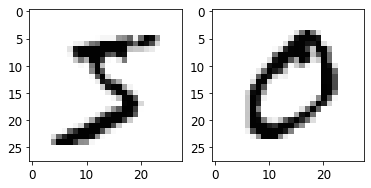

In [7]:
#check data in training set as visual:
print('Training data shape', X_train1.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train1[0].reshape(28, 28), cmap=plt.cm.Greys);
ax2.imshow(X_train1[1].reshape(28, 28), cmap=plt.cm.Greys);

In [8]:
#define confusion matrix plot
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, RMSprop

Using TensorFlow backend.


In [9]:
# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X_train1))
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

# the model data will be standardized form of preliminary model data
X_train = scaler.fit_transform(X_train1)

StandardScaler(copy=True, with_mean=True, with_std=True)
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.23529419e-06 3.07189544e-05 1.41176472e-05 5.88235321e-07
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.04575170e-06 3.59477134e-06 3.64052301e-05 9.52287595e-05
 1.71437911e-04 2.51372554e-04 4.71111118e-04 6.30326806e-04
 6.83071906e-04 6.95817004e-04 7.42418314e-04 6.82941185e-04
 7.33071908e-04 6.02549029e-04 3.92614386e-04 2.79346409e-04
 2.11045755e-04 8.37908509e-05 3.95424849e-05 1.38562094e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.18300678e-06 2.74509806e-06
 2.72549031e-05 2.15032683e-

In [10]:
# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X_test1))
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)

# the model data will be standardized form of preliminary model data
X_test = scaler.fit_transform(X_test1)

StandardScaler(copy=True, with_mean=True, with_std=True)
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.49019614e-05 9.25490201e-05 6.19607866e-05
 1.58039218e-04 2.00392162e-04 4.10588240e-04 9.18823545e-04
 1.21098041e-03 1.04313728e-03 1.20823531e-03 9.18823544e-04
 2.70980397e-04 3.51764712e-04 3.68627456e-04 1.96862746e-04
 7.52941206e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.71372555e-

### Model 1

In [10]:
%%time
start = time.process_time()
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf1 = tf.estimator.DNNClassifier(hidden_units=[10,10], n_classes=10,
                                     feature_columns=feature_cols)

input_fn1 = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=20, batch_size=100, shuffle=True)
dnn_clf1.train(input_fn=input_fn1)
duration1 = time.process_time() - start

CPU times: user 23.6 s, sys: 2.89 s, total: 26.5 s
Wall time: 13.8 s


In [11]:
#evaluate training accuracy (2a)
train1_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, shuffle=False)
eval_results_train1 = dnn_clf1.evaluate(input_fn=train1_input_fn)
eval_results_train1

{'accuracy': 0.92698336,
 'average_loss': 0.25567007,
 'loss': 32.708324,
 'global_step': 12000}

In [12]:
a1_train = eval_results_train1['accuracy']

In [13]:
#evaluate test accuracy (2a)
test1_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results_test1 = dnn_clf1.evaluate(input_fn=test1_input_fn)
eval_results_test1

{'accuracy': 0.9194,
 'average_loss': 0.27792758,
 'loss': 35.180706,
 'global_step': 12000}

### Model 2

In [14]:
%%time
start = time.process_time()
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf2 = tf.estimator.DNNClassifier(hidden_units=[20,20], n_classes=10,
                                     feature_columns=feature_cols)

input_fn2 = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=20, batch_size=100, shuffle=True)
dnn_clf2.train(input_fn=input_fn2)
duration2 = time.process_time() - start

CPU times: user 27.4 s, sys: 3.17 s, total: 30.6 s
Wall time: 14.2 s


In [15]:
#evaluate training accuracy (2b)
train2_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, shuffle=False)
eval_results_train2 = dnn_clf2.evaluate(input_fn=train2_input_fn)
eval_results_train2

{'accuracy': 0.9676,
 'average_loss': 0.11114275,
 'loss': 14.218689,
 'global_step': 12000}

In [16]:
#evaluate test accuracy (2b)
test2_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results_test2 = dnn_clf2.evaluate(input_fn=test2_input_fn)
eval_results_test2

{'accuracy': 0.9579,
 'average_loss': 0.15060125,
 'loss': 19.06345,
 'global_step': 12000}

### Model 3

In [17]:
%%time
start = time.process_time()
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf3 = tf.estimator.DNNClassifier(hidden_units=[10,10,10,10,10], n_classes=10,
                                     feature_columns=feature_cols)

input_fn3 = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=20, batch_size=100, shuffle=True)
dnn_clf3.train(input_fn=input_fn3)
duration3 = time.process_time() - start

CPU times: user 26.9 s, sys: 3.57 s, total: 30.5 s
Wall time: 15 s


In [18]:
#evaluate training accuracy (5a)
train3_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, shuffle=False)
eval_results_train3 = dnn_clf3.evaluate(input_fn=train3_input_fn)
eval_results_train3

{'accuracy': 0.9221,
 'average_loss': 0.2765352,
 'loss': 35.37764,
 'global_step': 12000}

In [19]:
#evaluate test accuracy (5a)
test3_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results_test3 = dnn_clf3.evaluate(input_fn=test3_input_fn)
eval_results_test3

{'accuracy': 0.9073,
 'average_loss': 0.32084632,
 'loss': 40.613457,
 'global_step': 12000}

### Model 4

In [20]:
%%time
start = time.process_time()
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf4 = tf.estimator.DNNClassifier(hidden_units=[20,20,20,20,20], n_classes=10,
                                     feature_columns=feature_cols)

input_fn4 = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=20, batch_size=100, shuffle=True)
dnn_clf4.train(input_fn=input_fn4)
duration4 = time.process_time() - start

CPU times: user 31 s, sys: 3.92 s, total: 34.9 s
Wall time: 15.6 s


In [21]:
#evaluate training accuracy (5a)
train4_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, shuffle=False)
eval_results_train4 = dnn_clf4.evaluate(input_fn=train4_input_fn)
eval_results_train4

{'accuracy': 0.9676667,
 'average_loss': 0.10853379,
 'loss': 13.88492,
 'global_step': 12000}

In [22]:
#evaluate test accuracy (5a)
test4_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results_test4 = dnn_clf4.evaluate(input_fn=test4_input_fn)
eval_results_test4

{'accuracy': 0.9499,
 'average_loss': 0.18247624,
 'loss': 23.098257,
 'global_step': 12000}

### Model 5

In [26]:
%%time
start = time.process_time()
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf5 = tf.estimator.DNNClassifier(hidden_units=[300,300], n_classes=10,
                                     feature_columns=feature_cols)

input_fn5 = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=20, batch_size=100, shuffle=True)
dnn_clf5.train(input_fn=input_fn5)
duration5 = time.process_time() - start

CPU times: user 1min 57s, sys: 8.21 s, total: 2min 5s
Wall time: 35.8 s


In [27]:
#evaluate training accuracy (5a)
train5_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, shuffle=False)
eval_results_train5 = dnn_clf5.evaluate(input_fn=train5_input_fn)
eval_results_train5

{'accuracy': 0.99975,
 'average_loss': 0.0028068793,
 'loss': 0.35908905,
 'global_step': 12000}

In [28]:
#evaluate test accuracy (5a)
test5_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results_test5 = dnn_clf5.evaluate(input_fn=test5_input_fn)
eval_results_test5

{'accuracy': 0.9796,
 'average_loss': 0.09115615,
 'loss': 11.538753,
 'global_step': 12000}

### Model 6

In [29]:
%%time
start = time.process_time()
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf6 = tf.estimator.DNNClassifier(hidden_units=[300,300,300], n_classes=10,
                                     feature_columns=feature_cols)

input_fn6 = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=20, batch_size=100, shuffle=True)
dnn_clf6.train(input_fn=input_fn6)
duration6 = time.process_time() - start

CPU times: user 2min 36s, sys: 11 s, total: 2min 47s
Wall time: 45.4 s


In [30]:
#evaluate training accuracy (5a)
train6_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, shuffle=False)
eval_results_train6 = dnn_clf6.evaluate(input_fn=train6_input_fn)
eval_results_train6

{'accuracy': 0.9996333,
 'average_loss': 0.0023298624,
 'loss': 0.29806343,
 'global_step': 12000}

In [31]:
#evaluate test accuracy (5a)
test6_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results_test6 = dnn_clf6.evaluate(input_fn=test6_input_fn)
eval_results_test6

{'accuracy': 0.9732,
 'average_loss': 0.15157129,
 'loss': 19.18624,
 'global_step': 12000}

### Model 7

In [32]:
%%time
start = time.process_time()
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf7 = tf.estimator.DNNClassifier(hidden_units=[150,150], n_classes=10,
                                     feature_columns=feature_cols)

input_fn7 = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=20, batch_size=100, shuffle=True)
dnn_clf7.train(input_fn=input_fn7)
duration7 = time.process_time() - start

CPU times: user 1min 3s, sys: 5.92 s, total: 1min 9s
Wall time: 24.1 s


In [34]:
#evaluate training accuracy (5a)
train7_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, shuffle=False)
eval_results_train7 = dnn_clf7.evaluate(input_fn=train7_input_fn)
eval_results_train7

{'accuracy': 0.9992833,
 'average_loss': 0.0053068018,
 'loss': 0.6789085,
 'global_step': 12000}

In [35]:
#evaluate test accuracy (5a)
test7_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results_test7 = dnn_clf7.evaluate(input_fn=test7_input_fn)
eval_results_test7

{'accuracy': 0.9768,
 'average_loss': 0.102281146,
 'loss': 12.94698,
 'global_step': 12000}

### Model 8

In [36]:
%%time
start = time.process_time()
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
dnn_clf8 = tf.estimator.DNNClassifier(hidden_units=[150,150,150], n_classes=10,
                                     feature_columns=feature_cols)

input_fn8 = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=20, batch_size=100, shuffle=True)
dnn_clf8.train(input_fn=input_fn8)
duration8 = time.process_time() - start

CPU times: user 1min 15s, sys: 7.35 s, total: 1min 22s
Wall time: 28.5 s


In [37]:
#evaluate training accuracy (5a)
train8_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, shuffle=False)
eval_results_train8 = dnn_clf8.evaluate(input_fn=train8_input_fn)
eval_results_train8

{'accuracy': 0.99925,
 'average_loss': 0.004428439,
 'loss': 0.56653804,
 'global_step': 12000}

In [38]:
#evaluate test accuracy (5a)
test8_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results_test8 = dnn_clf8.evaluate(input_fn=test8_input_fn)
eval_results_test8

{'accuracy': 0.9762,
 'average_loss': 0.12706533,
 'loss': 16.084219,
 'global_step': 12000}

In [39]:
a1_train = eval_results_train1['accuracy']
a1_test = eval_results_test1['accuracy']
a2_train = eval_results_train2['accuracy']
a2_test = eval_results_test2['accuracy']
a3_train = eval_results_train3['accuracy']
a3_test = eval_results_test3['accuracy']
a4_train = eval_results_train4['accuracy']
a4_test = eval_results_test4['accuracy']
a5_train = eval_results_train5['accuracy']
a5_test = eval_results_test5['accuracy']
a6_train = eval_results_train6['accuracy']
a6_test = eval_results_test6['accuracy']
a7_train = eval_results_train7['accuracy']
a7_test = eval_results_test7['accuracy']
a8_train = eval_results_train8['accuracy']
a8_test = eval_results_test8['accuracy']

def convert(seconds): 
    seconds = seconds % (24 * 3600) 
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
      
    return "%02d:%02d" % (minutes, seconds)

d1 = convert(duration1)
d2 = convert(duration2)
d3 = convert(duration3)
d4 = convert(duration4)
d5 = convert(duration5)
d6 = convert(duration6)
d7 = convert(duration7)
d8 = convert(duration8)

In [41]:
nn_summary_df = pd.DataFrame(
    {
        "Number Of Layers": [2, 2, 5, 5, 2, 3, 2, 3],
        "Nodes Per Layer": [10, 20, 10, 20, 300, 300, 150, 150],
        "Processing Time": [d1, d2, d3, d4, d5, d6, d7, d8],
        "Training Set Accuracy": [a1_train, a2_train, a3_train, a4_train, a5_train, a6_train, a7_train, a8_train],
        "Test Set Accuracy": [a1_test, a2_test, a3_test, a4_test, a5_test, a6_test, a7_test, a8_test]
    },
    index=["Model 1", "Model 2", "Model 3", "Model 4", "Model 5", "Model 6", "Model 7", "Model 8"]
)

nn_summary_df

,Number Of Layers,Nodes Per Layer,Processing Time,Training Set Accuracy,Test Set Accuracy
Model 1,2,10,00:26,0.926983,0.9194
Model 2,2,20,00:30,0.967600,0.9579
Model 3,5,10,00:30,0.922100,0.9073
Model 4,5,20,00:34,0.967667,0.9499
Model 5,2,300,02:05,0.999750,0.9796
Model 6,3,300,02:47,0.999633,0.9732
Model 7,2,150,01:09,0.999283,0.9768
Model 8,3,150,01:22,0.999250,0.9762
